In [ ]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train = pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Checking For Null Values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

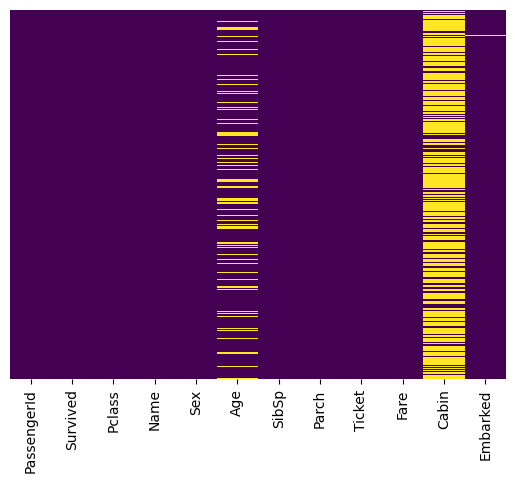

In [ ]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

<Axes: xlabel='Survived', ylabel='count'>

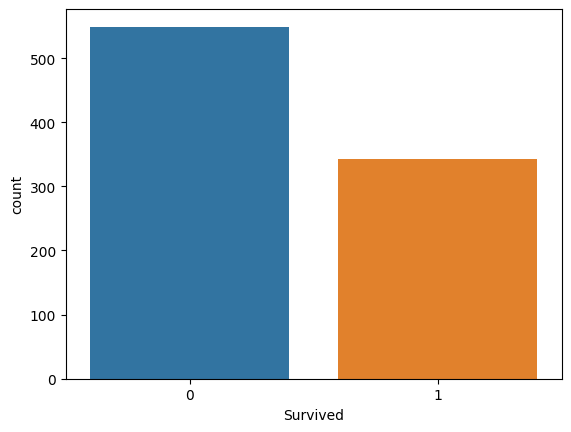

In [ ]:
#Comparing Death vs Survival
sns.set_style = ('whitegrid')
sns.countplot(x = 'Survived', data=train)

<Axes: xlabel='Survived', ylabel='count'>

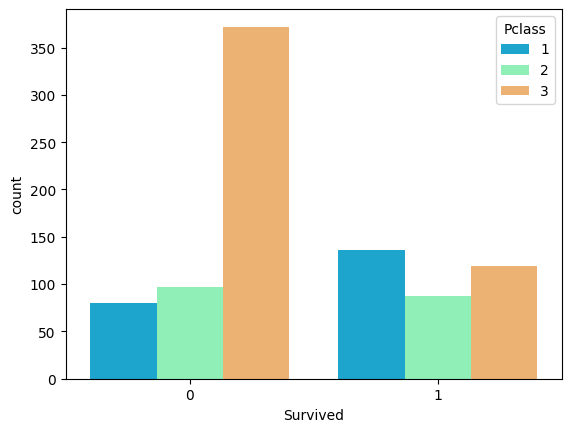

In [ ]:
#Comparing Survival Rate Amongst Different Passenger Classes
sns.set_style = ('whitegrid')
sns.countplot(x='Survived', hue = 'Pclass', data = train, palette = 'rainbow')

<ipython-input-10-5f1d805fa5bb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(), kde = False, color = 'darkred', bins= 40)


<Axes: xlabel='Age'>

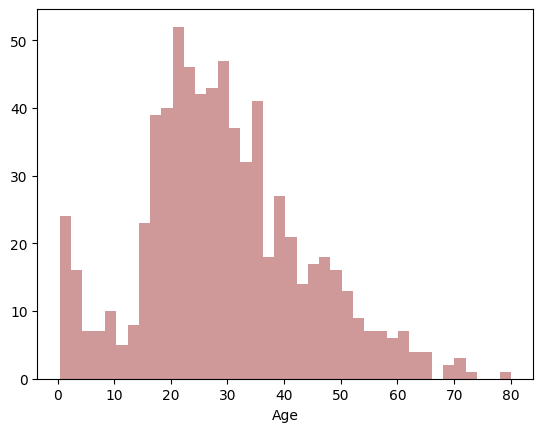

In [ ]:
#Plotting Different Age Classes of Boarders
sns.distplot(train['Age'].dropna(), kde = False, color = 'darkred', bins= 40)

<Axes: xlabel='SibSp', ylabel='count'>

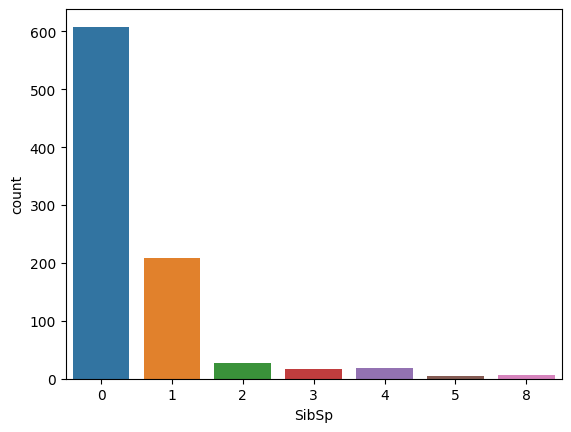

In [ ]:
sns.countplot(x='SibSp', data=train)

<Axes: xlabel='Pclass', ylabel='Age'>

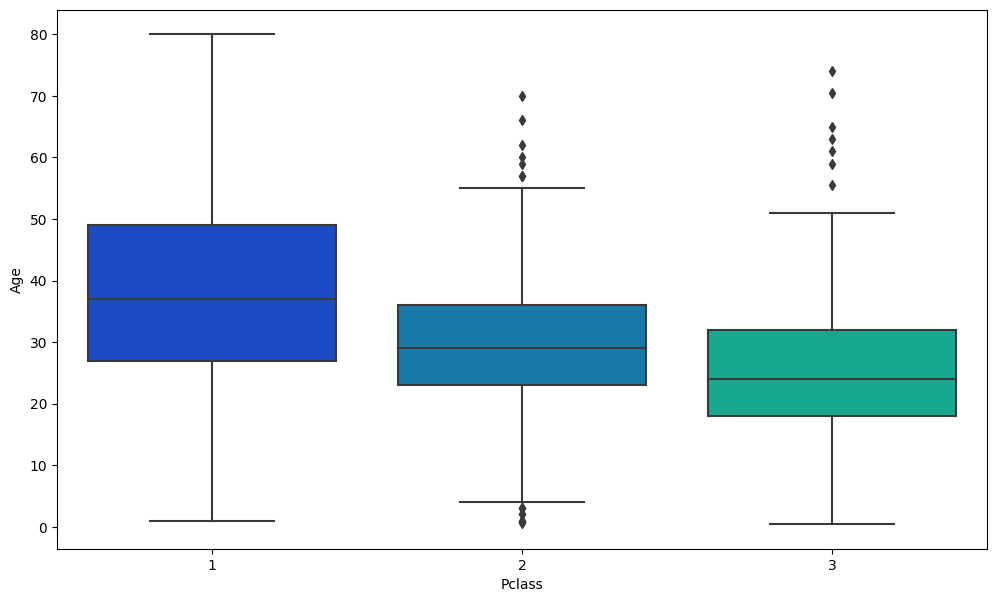

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x = 'Pclass', y='Age', data=train, palette = 'winter')

In [ ]:
def input_age(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24

  else:
    return Age

In [ ]:
train['Age'] = train[['Age', 'Pclass']].apply(input_age, axis = 1)

<Axes: >

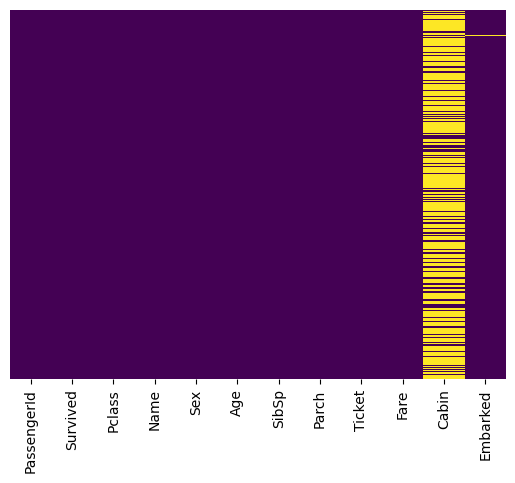

In [ ]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [ ]:
train.drop('Cabin', axis = 1, inplace = True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
train.dropna(inplace=True)

In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
pd.get_dummies(train['Embarked'], drop_first = True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
sex = pd.get_dummies(train['Sex'], drop_first = True)
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [ ]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [ ]:
train = pd.concat([train, sex, embark], axis = 1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
train.drop('Survived', axis = 1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [ ]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(train.drop('Survived', axis = 1), train['Survived'], test_size = 0.30, random_state = 101)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = confusion_matrix(Y_test, predictions)

In [ ]:
accuracy

array([[149,  14],
       [ 39,  65]])

In [ ]:
accuracy = accuracy_score(Y_test, predictions)
accuracy

0.8014981273408239

In [ ]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])